<a href="https://colab.research.google.com/github/tiaaulia38/Tugas11_EDA/blob/main/Tugas11_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link dataset : https://www.kaggle.com/datasets/brsahan/e-commerce-dataset

# Tugas 11 EDA

In [2]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlb
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

## Data Understanding

In [3]:
df = pd.read_csv('/content/drive/MyDrive/MSIB/Cakap/Tugas/Tugas_11/realistic_e_commerce_sales_data.csv')

In [5]:
# Melihat 5 data teratas
df.head()

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
0,CUST0268,Male,North,NaN,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08
1,CUST0046,Male,West,22.0,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09
2,CUST0169,Female,South,54.0,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28
3,CUST0002,Male,North,23.0,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18
4,CUST0173,Female,South,NaN,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19


In [8]:
# Melihat jumlah baris dan kolom data
df.shape

(1000, 12)

In [9]:
# Pengecekan data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      1000 non-null   object 
 1   Gender           1000 non-null   object 
 2   Region           950 non-null    object 
 3   Age              900 non-null    float64
 4   Product Name     1000 non-null   object 
 5   Category         1000 non-null   object 
 6   Unit Price       1000 non-null   float64
 7   Quantity         1000 non-null   int64  
 8   Total Price      1000 non-null   int64  
 9   Shipping Fee     1000 non-null   float64
 10  Shipping Status  950 non-null    object 
 11  Order Date       1000 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 93.9+ KB


In [10]:
# Melihat deskripsi dataset
df.describe()

,Age,Unit Price,Quantity,Total Price,Shipping Fee
count,900.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,46.695556,457.703777,3.008000,1346.600000,12.416390
std,15.011400,537.231434,1.404246,1834.037877,4.412185
min,18.000000,30.000000,1.000000,30.000000,5.000000
25%,35.000000,50.000000,2.000000,200.000000,8.560000
50%,49.000000,200.000000,3.000000,600.000000,12.315000
75%,59.000000,800.000000,4.000000,1500.000000,16.075000
max,69.000000,3109.560612,5.000000,7500.000000,19.980000


## EDA

In [14]:
#missing value check
df.isnull().sum()

,0
Customer ID,0
Gender,0
Region,50
Age,100
Product Name,0
Category,0
Unit Price,0
Quantity,0
Total Price,0
Shipping Fee,0


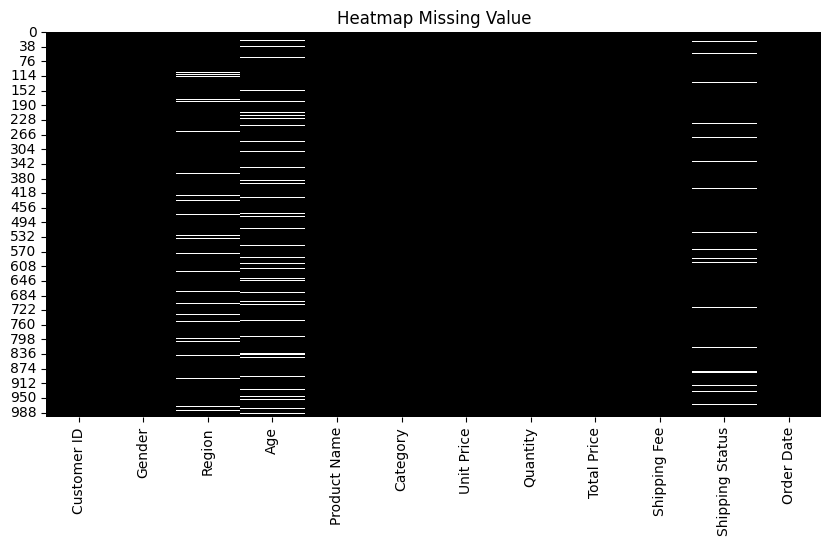

In [16]:
#Visualisasikan missing value dengan heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar = False, cmap="gray")
plt.title('Heatmap Missing Value')
plt.show()

Library `missingno` digunakan untuk visualisasi missing value yang terdapat pada dataset. Tak hanya berbentuk bar chart, tetapi bisa juga dalam bentuk matrix ataupun heatmap

<Axes: >

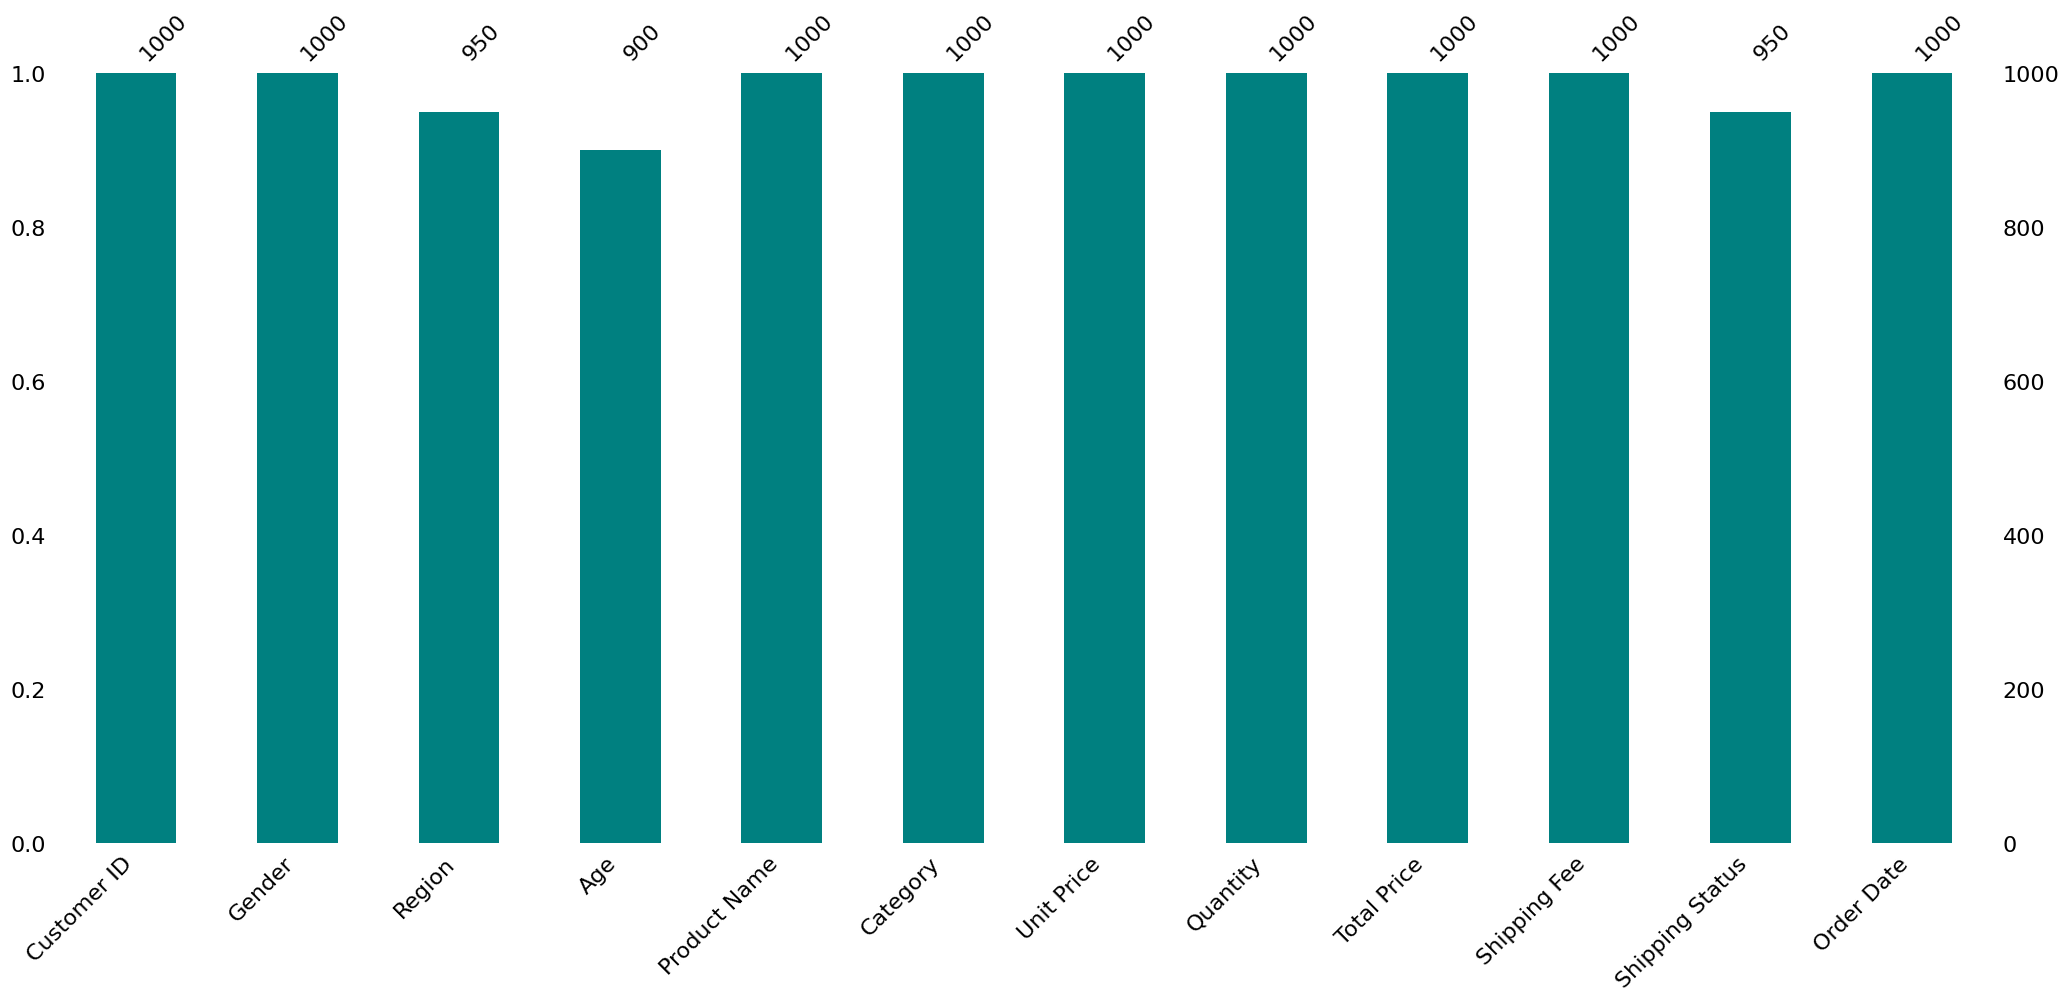

In [17]:
#Missing Value Checking Menggunakan Library Missingno
import missingno as msno
msno.bar(df, color='teal')

In [19]:
#mengecek presentase missing value Age
missing_values_count = df['Age'].isnull().sum()
total_values = len(df['Age'])
missing_percentage = (missing_values_count / total_values) * 100

print(f"Presentase missing values pada kolom Age: {missing_percentage}%")

Presentase missing values pada kolom Age: 10.0%


In [21]:
#mengecek presentase missing value Region
missing_values_count = df['Region'].isnull().sum()
total_values = len(df['Region'])
missing_percentage = (missing_values_count / total_values) * 100

print(f"Presentase missing values pada kolom Region: {missing_percentage}%")

Presentase missing values pada kolom Region: 5.0%


In [22]:
#mengecek presentase missing value Age
missing_values_count = df['Shipping Status'].isnull().sum()
total_values = len(df['Shipping Status'])
missing_percentage = (missing_values_count / total_values) * 100

print(f"Presentase missing values pada kolom Shipping Status: {missing_percentage}%")

Presentase missing values pada kolom Shipping Status: 5.0%


In [15]:
# check duplicate
df1 = df.apply(lambda x:sum(x.duplicated()))
print(df1)

Customer ID        708
Gender             998
Region             995
Age                947
Product Name       993
Category           997
Unit Price         987
Quantity           995
Total Price        974
Shipping Fee       270
Shipping Status    996
Order Date         660
dtype: int64


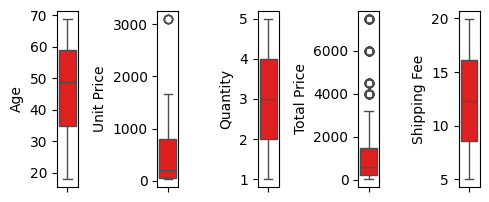

In [30]:
# outliers checking
nums = [i for i in df.columns if df[i].dtypes != 'object' and i not in 'id']

plt.figure(figsize=(6,6))
for i in range(0, len(nums)):
    plt.subplot(3, 6, i+1)
    sns.boxplot(y=df[nums[i]], color='red', orient='v')
    plt.tight_layout()

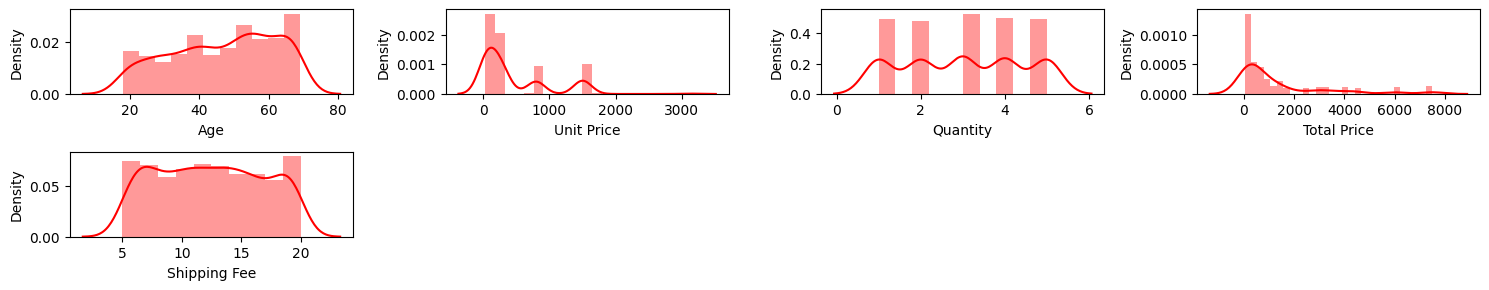

In [31]:
# distribusi data
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(3, 4, i+1)
    sns.distplot(df[nums[i]], color='red')
    plt.tight_layout()

## Data Cleaning

In [32]:
# Mengisi missing value pada kolom Region dengan modus
df['Region'].fillna(df['Region'].mode()[0], inplace=True)

# Mengisi missing value pada kolom Age dengan median (untuk data yang mungkin mengandung outlier)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Mengisi missing value pada kolom Shipping Status dengan modus
df['Shipping Status'].fillna(df['Shipping Status'].mode()[0], inplace=True)

In [33]:
df.isna().sum()

,0
Customer ID,0
Gender,0
Region,0
Age,0
Product Name,0
Category,0
Unit Price,0
Quantity,0
Total Price,0
Shipping Fee,0


## Memisahkan data kategorikal dan numerik

In [37]:
# Mengidentifikasi kolom yang benar-benar numerik
drop_col = ['index', 'Customer ID']
cat_cols = ['Gender', 'Region', 'Product Name', 'Category', 'Shipping Status']
num_cols = [i for i in df.columns if i not in (drop_col + cat_cols)]
num_cols = df[num_cols].select_dtypes(include=['number']).columns  # Pilih kolom numerik saja

## Handling Outlier

In [38]:
#@title Handling Outlier

# Fungsi untuk menghitung persentase outlier
def hitung_persentase_outlier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    jumlah_outlier = ((data < batas_bawah) | (data > batas_atas)).sum()
    persentase_outlier = jumlah_outlier / len(data) * 100
    return persentase_outlier

# Menghitung persentase outlier pada setiap kolom numerik
persentase_outlier = df[num_cols].apply(hitung_persentase_outlier)

print(persentase_outlier)

Age              0.0
Unit Price       0.4
Quantity         0.0
Total Price     12.4
Shipping Fee     0.0
dtype: float64


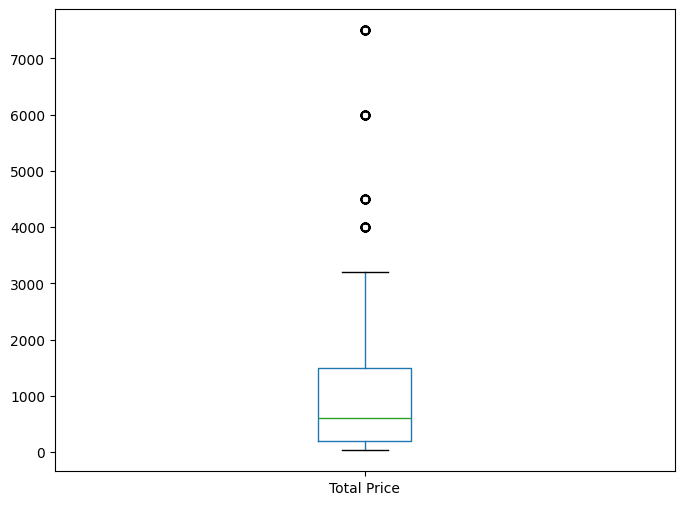

In [39]:
# check outlier total price
boxplot = df.boxplot(grid=False, column=["Total Price"],  figsize=(8,6))

In [13]:
!pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.0/375.0 kB 6.9 MB/s eta 0:00:00


In [14]:
from feature_engine.outliers import Winsorizer

# Buat Winsorizer
windsoriser = Winsorizer(capping_method='iqr', # pilih 'iqr' untuk batas aturan IQR atau 'gaussian' untuk mean dan std
                          tail='both',
                          fold=1.5,
                          variables=['Total Price', 'Unit Price'])

windsoriser.fit(df)

# Transformasikan data
df_copy = windsoriser.transform(df)

In [15]:
# Fungsi untuk membuat histogram dan boxplot.
# Fungsi ini menerima dataframe (df) dan variabel yang ingin dianalisis sebagai argumen.

def diagnostic_plots(df, variable):
    # Menentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()


Total Price - After Capping


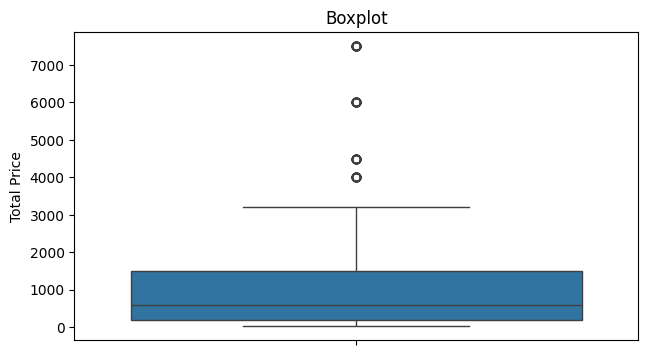

In [16]:
print('Total Price - After Capping')
diagnostic_plots(df, 'Total Price')

Unit Price - After Capping


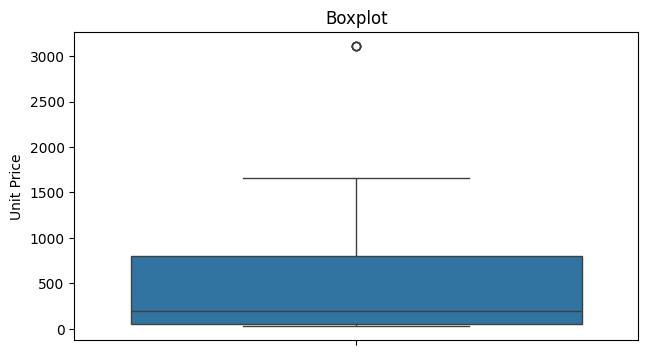

In [45]:
print('Unit Price - After Capping')
diagnostic_plots(df, 'Unit Price')

<Axes: >

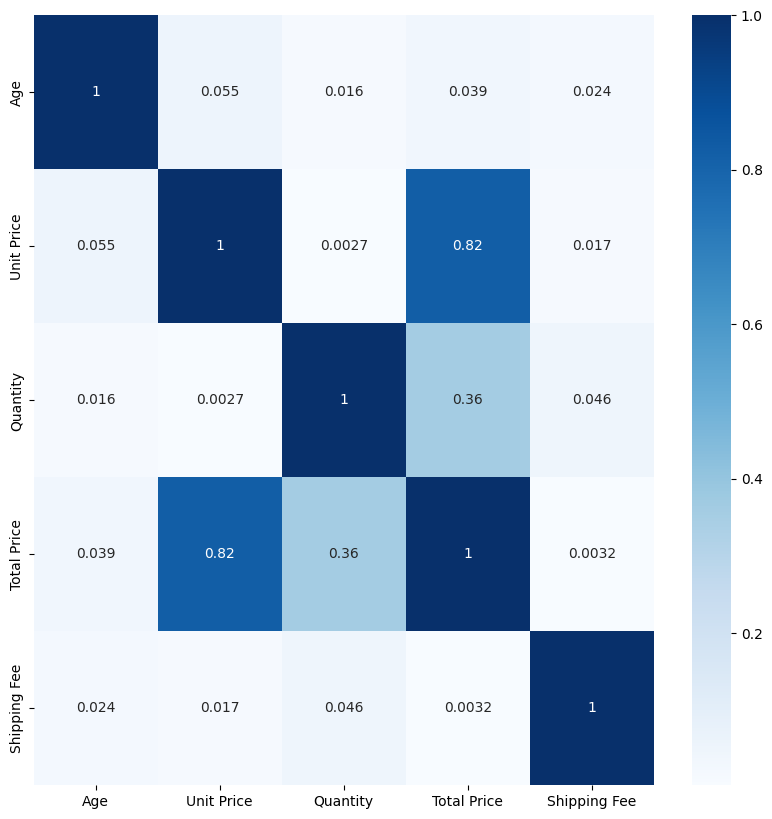

In [73]:
#menampilkan korelasi dengan heatmap

df_cor = df[['Age', 'Unit Price', 'Quantity', 'Total Price', 'Shipping Fee']]
plt.figure(figsize=(10,10))
sns.heatmap(df_cor.corr() , annot =True,cmap='Blues')

## Analisis EDA

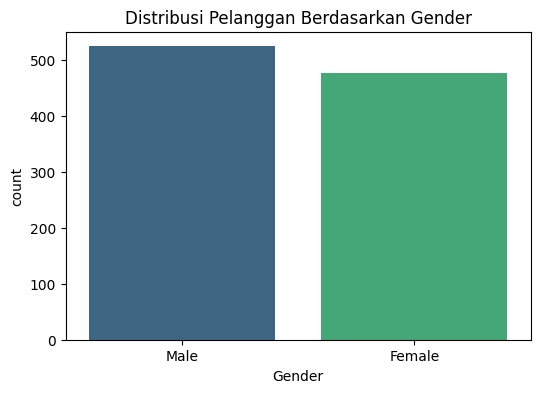

In [77]:
# Distribusi Pelanggan Berdasarkan Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', palette='viridis')
plt.title("Distribusi Pelanggan Berdasarkan Gender")
plt.show()

Pelanggan berjenis kelamin Male memiliki jumlah sedikit lebih banyak daripada pelanggan berjenis kelamin Female.

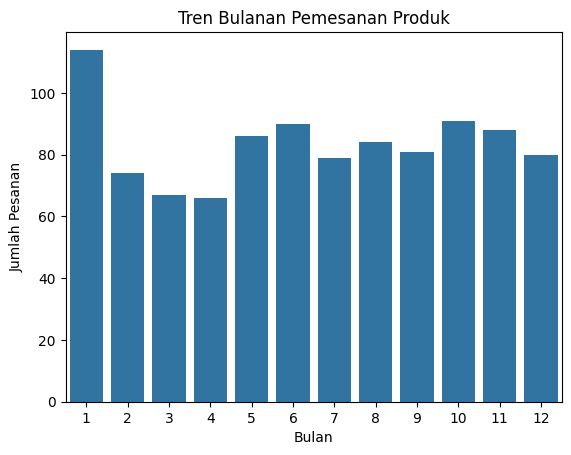

In [80]:
# Banyaknya pesanan yang dilakukan setiap bulan
# Dan bagaimana distribusi jumlah pesanan tersebut sepanjang tahun

# Mengubah kolom Order Date menjadi datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Menambahkan kolom bulan untuk analisis tren bulanan
df['Order Month'] = df['Order Date'].dt.month

# Visualisasi tren pesanan bulanan
sns.countplot(data=df, x='Order Month')
plt.title("Tren Bulanan Pemesanan Produk")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.show()

1. Bulan 1 (Januari) memiliki jumlah pesanan tertinggi, melampaui angka 100.
2. Bulan 2 hingga 4 mengalami penurunan jumlah pesanan dengan kisaran di bawah 80.
3. Bulan 5 hingga 12 cenderung stabil dengan jumlah pesanan berkisar antara 80 hingga 90, dengan sedikit fluktuasi.
4. Bulan dengan jumlah pesanan terendah adalah Bulan 3 dan 4

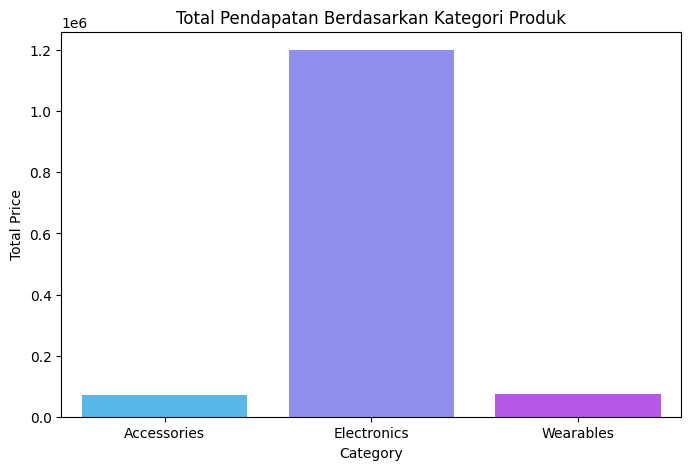

In [83]:
#  Total Pendapatan Berdasarkan Kategori Produk
category_sales = df.groupby('Category')['Total Price'].sum().reset_index() #Menghitung Total Pendapatan per Kategori
plt.figure(figsize=(8,5))
sns.barplot(data=category_sales, x='Category', y='Total Price', palette='cool')
plt.title("Total Pendapatan Berdasarkan Kategori Produk")
plt.show()

 kategori Electronics memberikan kontribusi pendapatan tertinggi, jauh melampaui kategori Accessories dan Wearables, yang total pendapatannya relatif kecil.

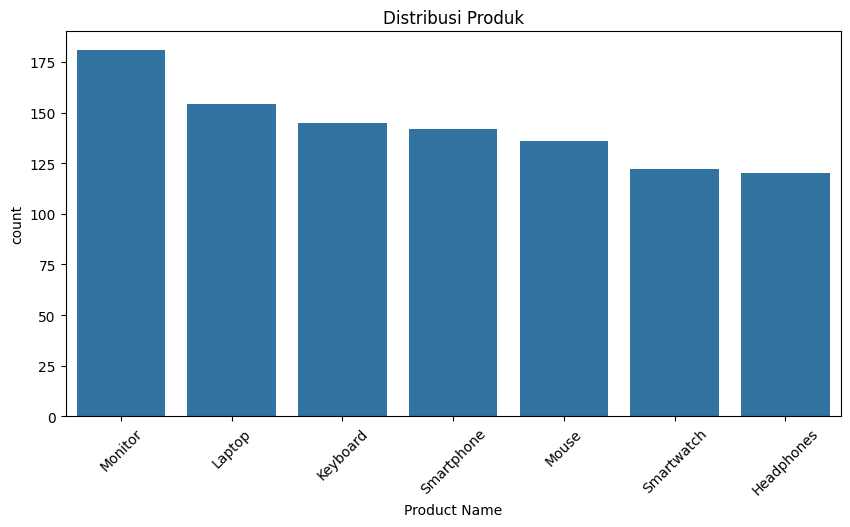

In [4]:
# Distribusi Produk Terlaris
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Product Name', order=df['Product Name'].value_counts().index)
plt.title('Distribusi Produk')
plt.xticks(rotation=45)
plt.show()

Berdasarkan grafik "Distribusi Produk" yang ditampilkan, kita dapat menyimpulkan bahwa produk dengan jumlah terbanyak adalah "Monitor", diikuti oleh "Laptop" dan "Keyboard". Sementara itu, produk dengan jumlah terendah adalah "Headphones"

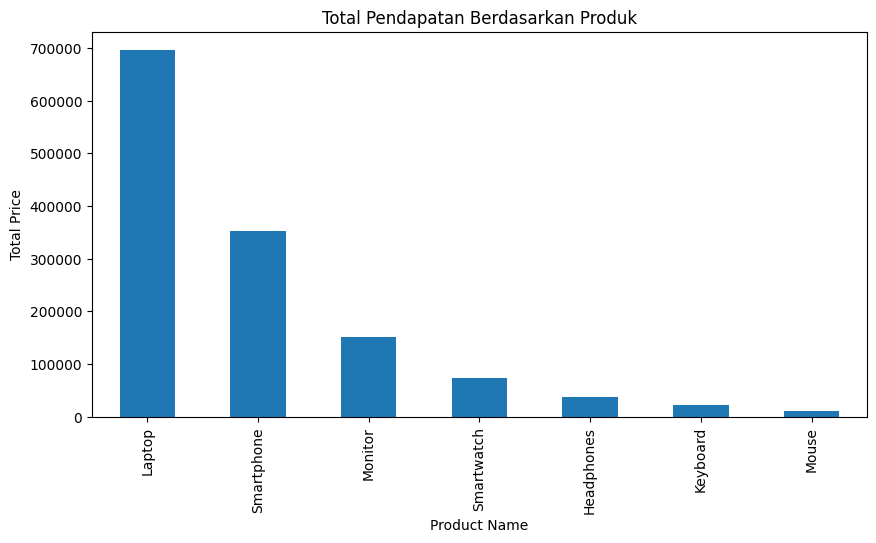

In [5]:
# Total Pendapatan Berdasarkan Produk
product_revenue = df.groupby('Product Name')['Total Price'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
product_revenue.plot(kind='bar')
plt.title('Total Pendapatan Berdasarkan Produk')
plt.ylabel('Total Price')
plt.show()

Secara keseluruhan, produk dengan harga lebih tinggi atau permintaan lebih besar (Laptop dan Smartphone) mendominasi pendapatan, sementara aksesori berkontribusi lebih rendah. Hal ini menunjukkan fokus perusahaan dapat diarahkan lebih pada produk dengan nilai tinggi untuk meningkatkan total pendapatan

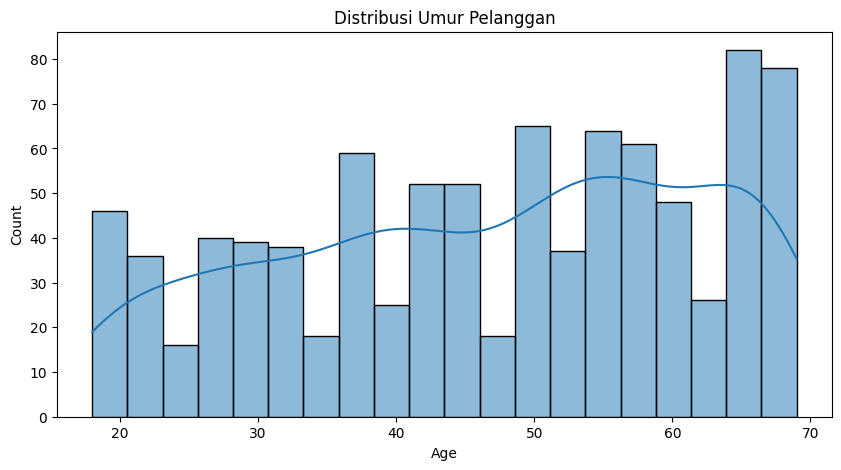

In [6]:
# Visualisasi distribusi umur
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribusi Umur Pelanggan')
plt.xlabel('Age')
plt.show()

Berdasarkan grafik "Distribusi Umur Pelanggan," kita dapat menyimpulkan bahwa:

1. Kelompok umur dengan jumlah pelanggan terbanyak adalah sekitar usia 60 hingga 70 tahun.
2. Kelompok usia sekitar 20-an dan 50-an juga memiliki jumlah pelanggan yang cukup signifikan.
3. Kelompok usia 30-an memiliki jumlah pelanggan yang relatif lebih rendah dibandingkan kelompok usia lainnya.


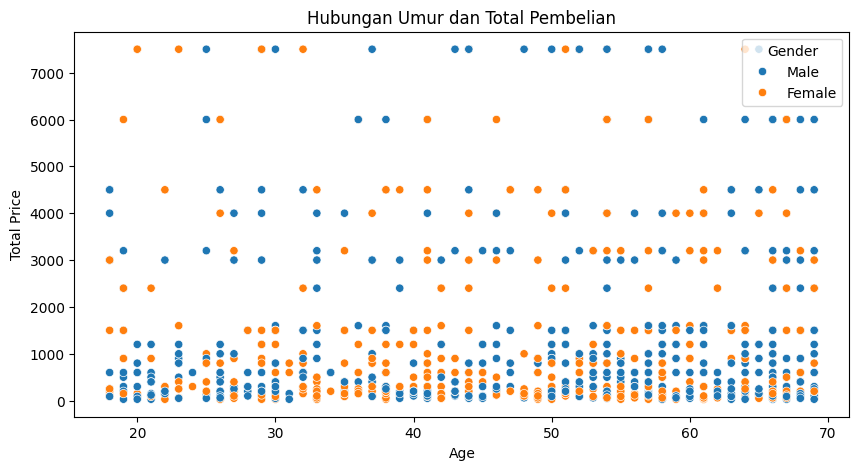

In [8]:
# Analisis umur terhadap total pembelian
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Age', y='Total Price', hue='Gender')
plt.title('Hubungan Umur dan Total Pembelian')
plt.show()

Berdasarkan grafik "Hubungan Umur dan Total Pembelian," terlihat bahwa:

1. Pembelian dengan nilai tinggi terjadi di berbagai rentang usia, dengan beberapa pembelian besar mencapai di atas 7000.
2. Baik pria maupun wanita tersebar merata dalam total pembelian di setiap kelompok usia, tanpa perbedaan mencolok antara jenis kelamin.
3. Sebagian besar pembelian berkisar di angka yang lebih rendah (di bawah 1000), menunjukkan bahwa pembelian besar relatif jarang.

Secara keseluruhan, usia tidak menunjukkan pola yang jelas terkait dengan total pembelian, dan jenis kelamin tidak menunjukkan perbedaan signifikan dalam jumlah pembelian.

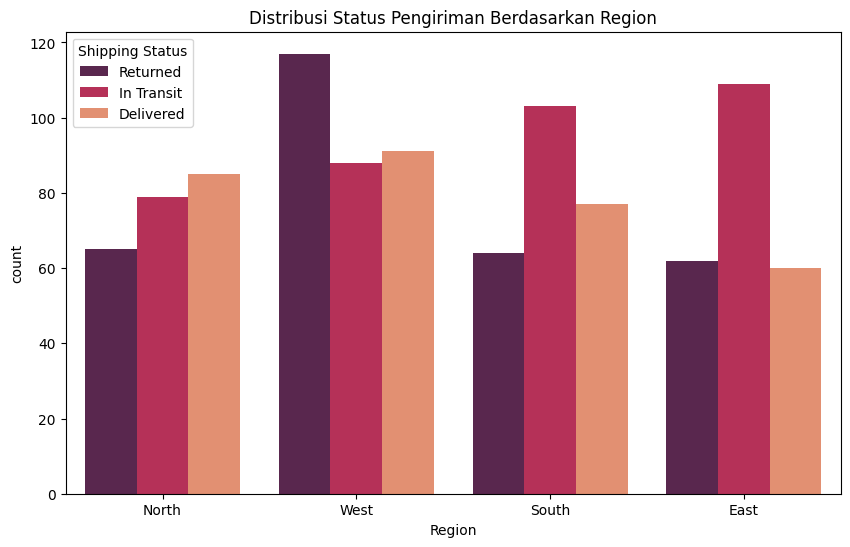

In [87]:
# Distribusi Status Pengiriman Berdasarkan Region
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Region', hue='Shipping Status', palette='rocket')
plt.title("Distribusi Status Pengiriman Berdasarkan Region")
plt.show()

1. Wilayah West memiliki jumlah pengiriman yang dikembalikan (Returned) paling tinggi, sementara pengiriman Delivered dan In Transit cenderung lebih seimbang di wilayah lainnya.
2. Wilayah North, South, dan East memiliki distribusi yang lebih merata untuk semua status pengiriman, tanpa ada satu status yang sangat mendominasi.